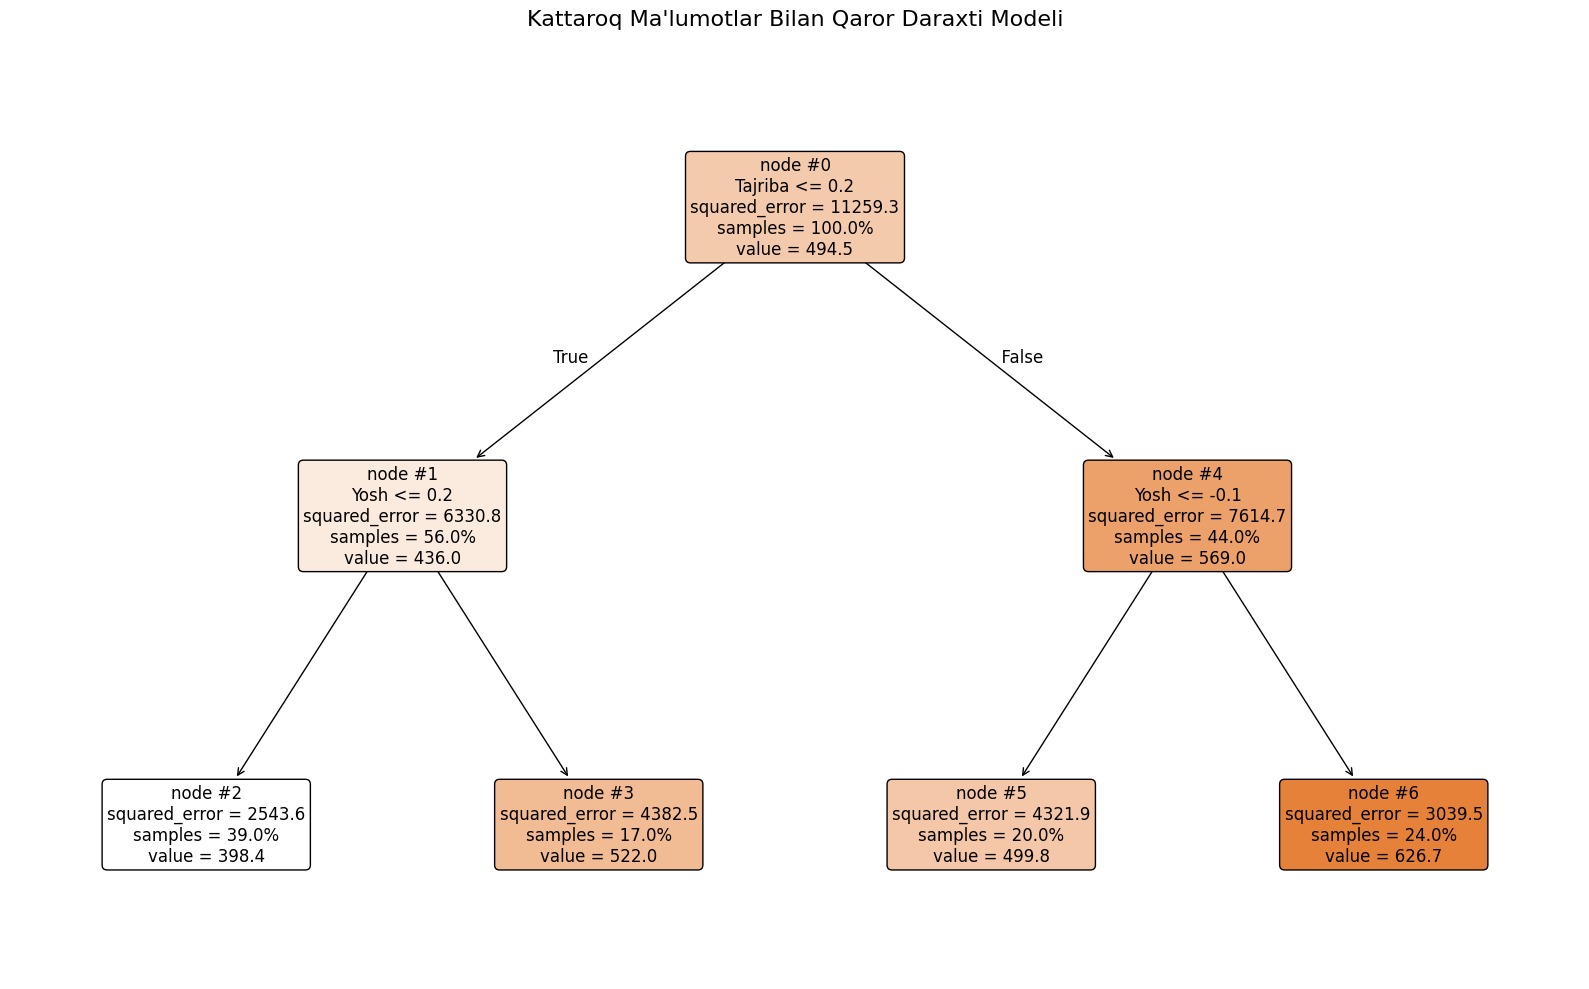

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression

# 100 ta tasodifiy ma'lumot yaratamiz
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
X = pd.DataFrame(X, columns=['Yosh', 'Tajriba'])
y = y + abs(y.min()) + 300  # Maoshlarni musbat qilamiz

# Qaror daraxti modelini yaratamiz
tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X, y)

# Kattaroq va aniqroq vizualizatsiya
plt.figure(figsize=(16, 10))
plot_tree(tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12,
          proportion=True,
          precision=1,
          impurity=True,
          node_ids=True)

plt.title("Kattaroq Ma'lumotlar Bilan Qaror Daraxti Modeli", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [3]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [4]:
from sklearn.datasets import fetch_california_housing

# California uylari narxlari ma'lumotlari
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)[['MedInc', 'HouseAge']]
y = data.target

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [5]:
tree = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [6]:
from sklearn.tree import export_text

print(export_text(tree, feature_names=list(X.columns)))

|--- MedInc <= 5.04
|   |--- MedInc <= 3.07
|   |   |--- MedInc <= 2.37
|   |   |   |--- value: [1.19]
|   |   |--- MedInc >  2.37
|   |   |   |--- value: [1.55]
|   |--- MedInc >  3.07
|   |   |--- HouseAge <= 38.50
|   |   |   |--- value: [1.96]
|   |   |--- HouseAge >  38.50
|   |   |   |--- value: [2.56]
|--- MedInc >  5.04
|   |--- MedInc <= 6.82
|   |   |--- HouseAge <= 36.50
|   |   |   |--- value: [2.77]
|   |   |--- HouseAge >  36.50
|   |   |   |--- value: [3.59]
|   |--- MedInc >  6.82
|   |   |--- MedInc <= 7.82
|   |   |   |--- value: [3.73]
|   |   |--- MedInc >  7.82
|   |   |   |--- value: [4.57]

